In [1]:
import pandas as pd
import geopandas as gpd
#from shapely.geometry import Point


In [65]:
from geopandas.tools import geocode
from geopy.exc import GeocoderTimedOut


In [66]:
from geopy.geocoders import OpenMapQuest

In [67]:
geolocator = OpenMapQuest(api_key='gvaeQn4ytdAwdXYlWGYgVBKaXvZuVRic')

In [68]:
def do_geocode(address):
    try:
        return geolocator.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)

In [84]:
info=do_geocode("shillong")

In [85]:
info

Location(Shillong, East Khasi Hills, Meghalaya, 793001, India, (25.5760154, 91.8828027, 0.0))

In [90]:
latlong = {'Shillong':''}

In [91]:
latlong['Shillong'] = info.point

In [92]:
latlong

{'Shillong': Point(25.5760154, 91.8828027, 0.0)}

In [126]:
for i in range(len(df)):
    if df.iloc[i,1] not in latlong:
        info=do_geocode(df.iloc[i,1])
        if info is not None:
            latlong[df.iloc[i,1]] = info.point
        else:
            latlong[df.iloc[i,1]] = ''

GeocoderServiceError: The operation did not complete (read) (_ssl.c:833)

In [127]:
len(latlong)

369

In [ ]:
#Store the picke file

In [129]:
try:
    import cPickle as pickle
except ImportError:  # python 3.x
    import pickle

with open('all-locations.p', 'wb') as fp:
    pickle.dump(latlong, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
#retrieve the pickle file
with open('data.p', 'rb') as fp:
    data = pickle.load(fp)

In [ ]:
#lets plot the points in world map

In [130]:
locationDf = pd.DataFrame.from_dict(latlong, orient='index')

In [156]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(locationDf.iloc[:,1], locationDf.iloc[:,0])]

In [157]:
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(locationDf, geometry=geometry)

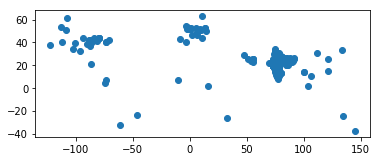

In [158]:
gdf.plot()

In [149]:
import matplotlib.pyplot as plt

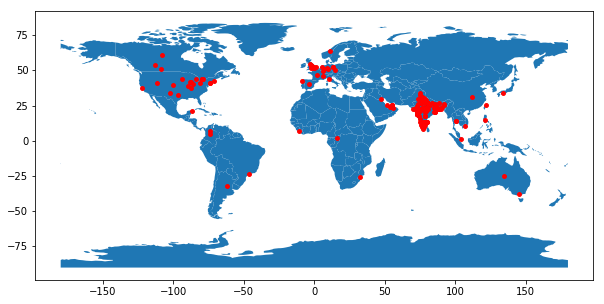

In [159]:
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [161]:
len(df)

3506